In [2]:
import numpy as np
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns           

import scipy.stats as stats
import math

pd.set_option('display.max_rows',1600)
pd.set_option('display.max_columns',1600)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


In [3]:
amazon_review_df=pd.read_csv('Amazon_Reviews.csv')
amazon_review_df.shape
amazon_review_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2
5,an absolute masterpiece: I am quite sure any ...,__label__2
6,"Buyer beware: This is a self-published book, ...",__label__1
7,Glorious story: I loved Whisper of the wicked...,__label__2
8,A FIVE STAR BOOK: I just finished reading Whi...,__label__2
9,Whispers of the Wicked Saints: This was a eas...,__label__2


In [4]:
amazon_review_df['Label']=amazon_review_df['Label'].map({'__label__1 ':0,'__label__2 ':1})
amazon_review_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
5,an absolute masterpiece: I am quite sure any ...,1
6,"Buyer beware: This is a self-published book, ...",0
7,Glorious story: I loved Whisper of the wicked...,1
8,A FIVE STAR BOOK: I just finished reading Whi...,1
9,Whispers of the Wicked Saints: This was a eas...,1


In [5]:
y=amazon_review_df['Label']
amazon_review_df.drop(columns='Label',inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(amazon_review_df,y,test_size=0.2,random_state=42)

X_train.shape

(159, 1)

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer=RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()


In [8]:
def preprocessing(review):
    final_tokens=' '
    
    tokens=tokenizer.tokenize(review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens


preprocessing('My name is Ravi Teja Golakoti')

'name ravi teja golakoti'

In [9]:
#lemmatizer('contries')
stemmer.stem('contries')

'contri'

In [10]:
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_train['Cleaned_text']

X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

In [11]:
vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])

X_train_Tfid=vectorizer.transform(X_train['Cleaned_text'])

X_test_Tfid=vectorizer.transform(X_test['Cleaned_text'])

vectorizer.vocabulary_

X_test_Tfid.shape

(40, 2120)

[[ 8  1]
 [ 7 24]]
0.7741935483870968
0.96
0.8571428571428571


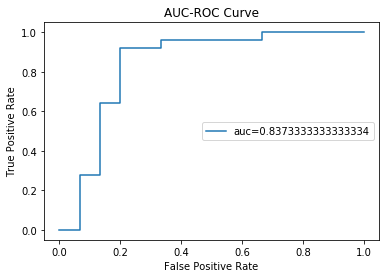

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

mnb=MultinomialNB()

mnb.fit(X_train_Tfid.toarray(),Y_train)

Y_predict=mnb.predict(X_test_Tfid.toarray())

print(confusion_matrix(Y_predict,Y_test))

print(recall_score(Y_predict,Y_test))

print(precision_score(Y_predict,Y_test))

print(f1_score(Y_predict,Y_test))

Y_pred_proba = mnb.predict_proba(X_test_Tfid)[::,1]

fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(Y_test, Y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()

In [13]:
def modelexecute(X_train,Y_train,X_test,Y_test,model):
    
    model.fit(X_train,Y_train)
    
    Y_predict=model.predict(X_test.toarray())
    
    print("{} \n confusion_matrix ------- \n{}".format(model,confusion_matrix(Y_predict,Y_test)))
    
    print('recall_score---------------',recall_score(Y_predict,Y_test))
    
    print('precision_score------------',precision_score(Y_predict,Y_test))

    print('f1_score-------------------',f1_score(Y_predict,Y_test))

    Y_pred_proba = model.predict_proba(X_test_Tfid)[::,1]

    fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

    auc = roc_auc_score(Y_test, Y_pred_proba)

    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC Curve')

    plt.legend(loc=5)
    plt.show()
    
    return auc


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 confusion_matrix ------- 
[[ 8  1]
 [ 7 24]]
recall_score--------------- 0.7741935483870968
precision_score------------ 0.96
f1_score------------------- 0.8571428571428571


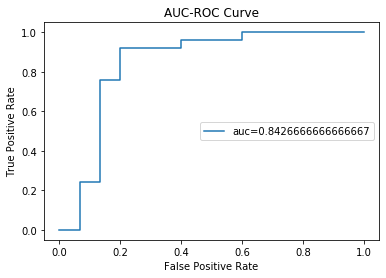

0.8426666666666667

In [14]:
LR=LogisticRegression()

modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,LR)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
 confusion_matrix ------- 
[[ 8 11]
 [ 7 14]]
recall_score--------------- 0.6666666666666666
precision_score------------ 0.56
f1_score------------------- 0.6086956521739131


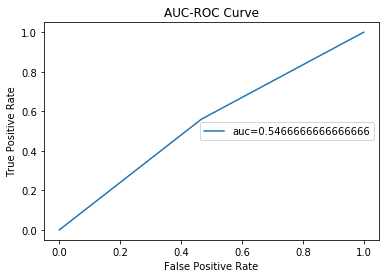

0.5466666666666666

In [15]:
DTR=DecisionTreeClassifier()
modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,DTR)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 confusion_matrix ------- 
[[ 8  0]
 [ 7 25]]
recall_score--------------- 0.78125
precision_score------------ 1.0
f1_score------------------- 0.8771929824561403


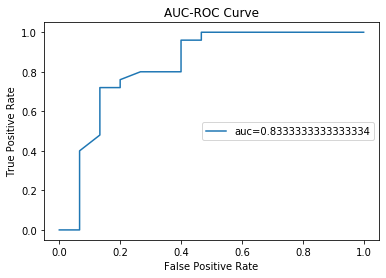

0.8333333333333334

In [16]:
RFS= RandomForestClassifier()
modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,RFS)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 
 confusion_matrix ------- 
[[ 6  3]
 [ 9 22]]
recall_score--------------- 0.7096774193548387
precision_score------------ 0.88
f1_score------------------- 0.7857142857142856


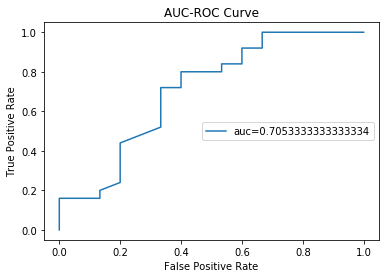

0.7053333333333334

In [17]:
ADB= AdaBoostClassifier()
modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,ADB)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
 confusion_matrix ------- 
[[10  2]
 [ 5 23]]
recall_score--------------- 0.8214285714285714
precision_score------------ 0.92
f1_score------------------- 0.8679245283018867


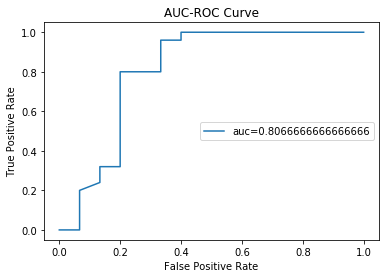

0.8066666666666666

In [18]:
GBC=GradientBoostingClassifier()
modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,GBC)

In [20]:
SGD=SGDClassifier()
modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,SGD)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
 confusion_matrix ------- 
[[12  2]
 [ 3 23]]
recall_score--------------- 0.8846153846153846
precision_score------------ 0.92
f1_score------------------- 0.9019607843137256


AttributeError: probability estimates are not available for loss='hinge'

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 confusion_matrix ------- 
[[ 8  1]
 [ 7 24]]
recall_score--------------- 0.7741935483870968
precision_score------------ 0.96
f1_score------------------- 0.8571428571428571


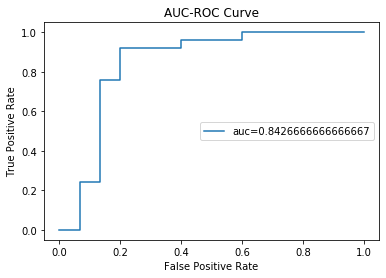

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
 confusion_matrix ------- 
[[ 9 11]
 [ 6 14]]
recall_score--------------- 0.7
precision_score------------ 0.56
f1_score------------------- 0.6222222222222222


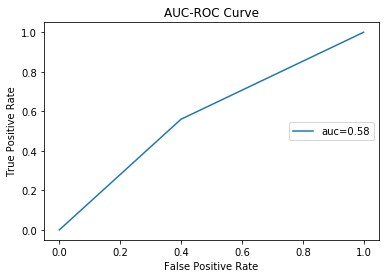

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 confusion_matrix ------- 
[[ 7  0]
 [ 8 25]]
recall_score--------------- 0.7575757575757576
precision_score------------ 1.0
f1_score------------------- 0.8620689655172413


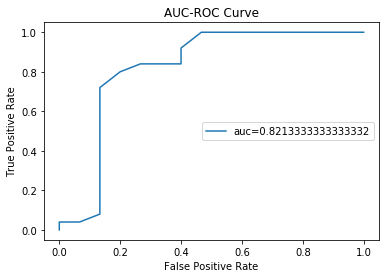

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 
 confusion_matrix ------- 
[[ 6  3]
 [ 9 22]]
recall_score--------------- 0.7096774193548387
precision_score------------ 0.88
f1_score------------------- 0.7857142857142856


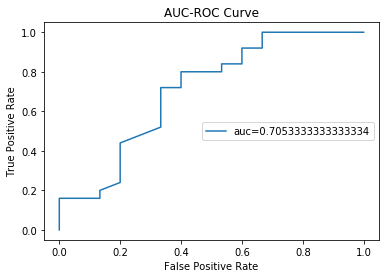

In [13]:
models = {
           'LR': LogisticRegression(), 
          'DTR': DecisionTreeClassifier(), 
          'RFS': RandomForestClassifier(), 
          'ADB': AdaBoostClassifier()
         }

for mName, model in models.items():
    obj = models[mName]
    modelexecute(X_train_Tfid,Y_train,X_test_Tfid,Y_test,obj)